### File Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from datetime import datetime
import os

# Load Data
df_before_cleaning = pd.read_csv('../data/data_wrangling.csv')
df = df_before_cleaning
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 3. Exploratory Data Analysis (EDA) and Feature Engineering

### 3.1 Target Variable Analysis

#### 3.1.1 Price Distribution
**Analyzing the distribution of house prices**

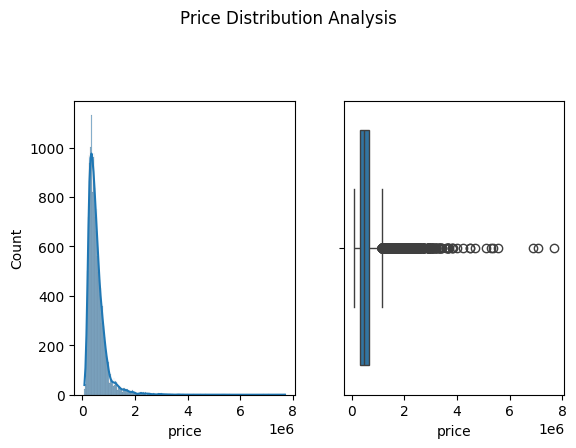

In [2]:
fig, axes = plt.subplots(1,2)
plt.suptitle("Price Distribution Analysis")

sns.histplot(df, x='price', ax= axes[0], kde=True)
sns.boxplot(df, x='price', ax= axes[1])

plt.tight_layout(pad=3)
plt.show()

#### 3.1.2 Log Transformation of Price
**Applying log transformation to handle price skewness**

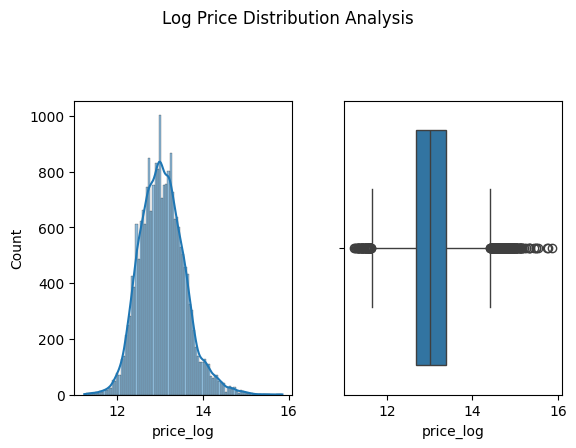

In [3]:
df['price_log'] = np.log1p(df['price'])
fig, axes = plt.subplots(1,2)
plt.suptitle("Log Price Distribution Analysis")

sns.histplot(df, x='price_log', ax= axes[0], kde=True)
sns.boxplot(df, x='price_log', ax= axes[1])

plt.tight_layout(pad=3)
plt.show()

### 3.2 Univariate Analysis

#### 3.2.1 Continuous Variables Distribution
**Histogram and boxplot analysis for numerical features**

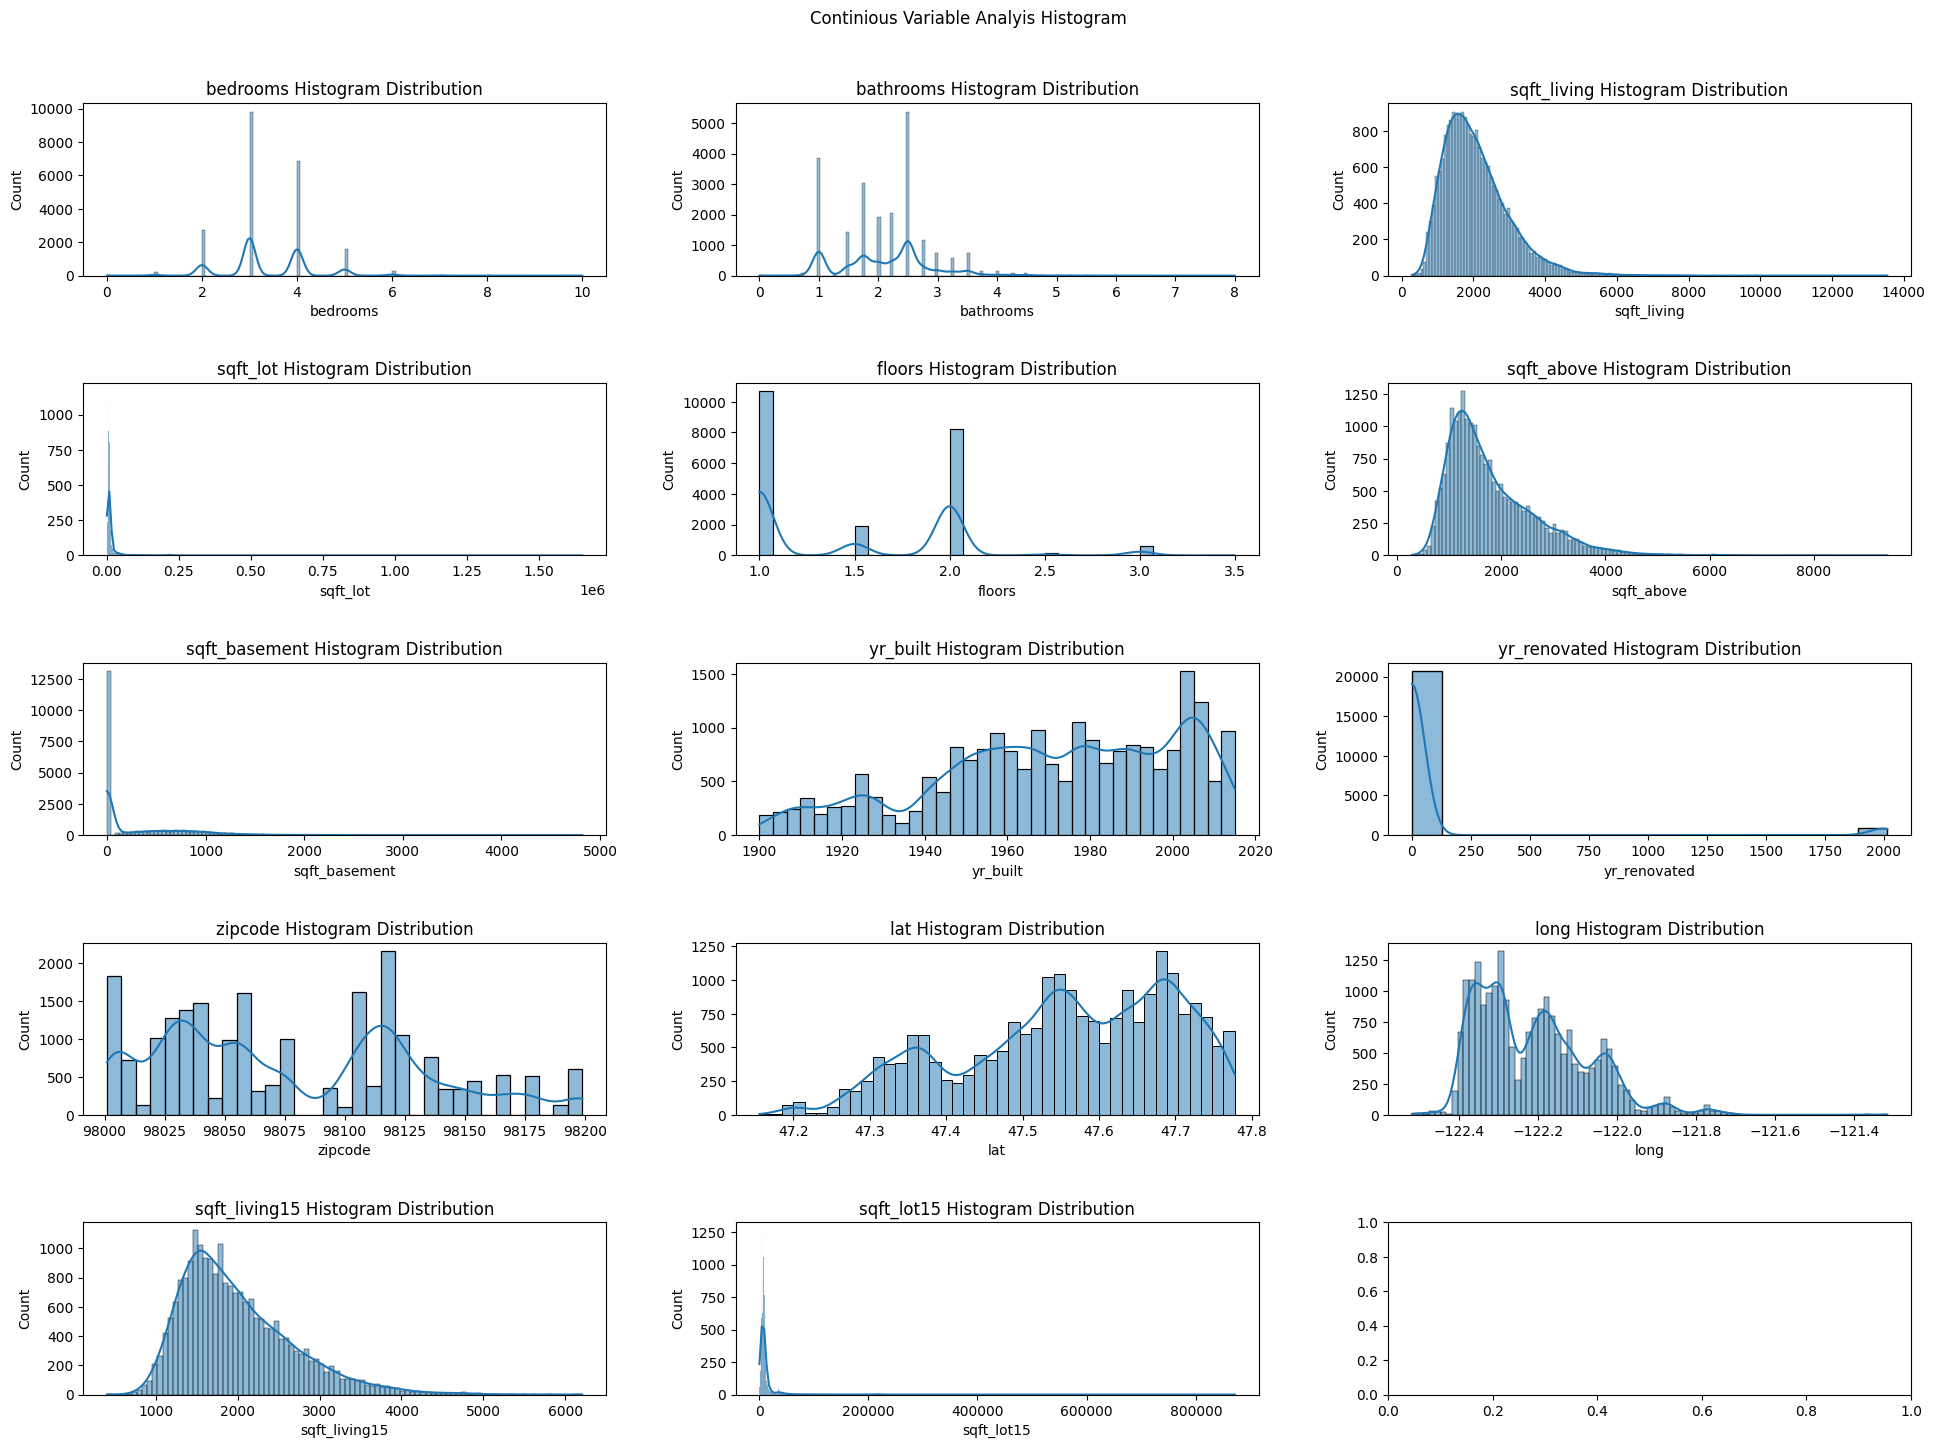

In [4]:
continous_features = df.drop(columns=['date','price', 'waterfront', 'view', 'condition', 'grade', 'price_log'])

fig , axes = plt.subplots(math.ceil(len(continous_features.columns)/3), 3, figsize=(20, 15))

plt.suptitle("Continious Variable Analyis Histogram")

for i, col in enumerate(continous_features.columns):
    sns.histplot(continous_features, x=col, ax= axes[i//3,i%3], kde=True)
    axes[i//3,i%3].set_title(f"{col} Histogram Distribution")

plt.tight_layout(pad=3)
plt.show()

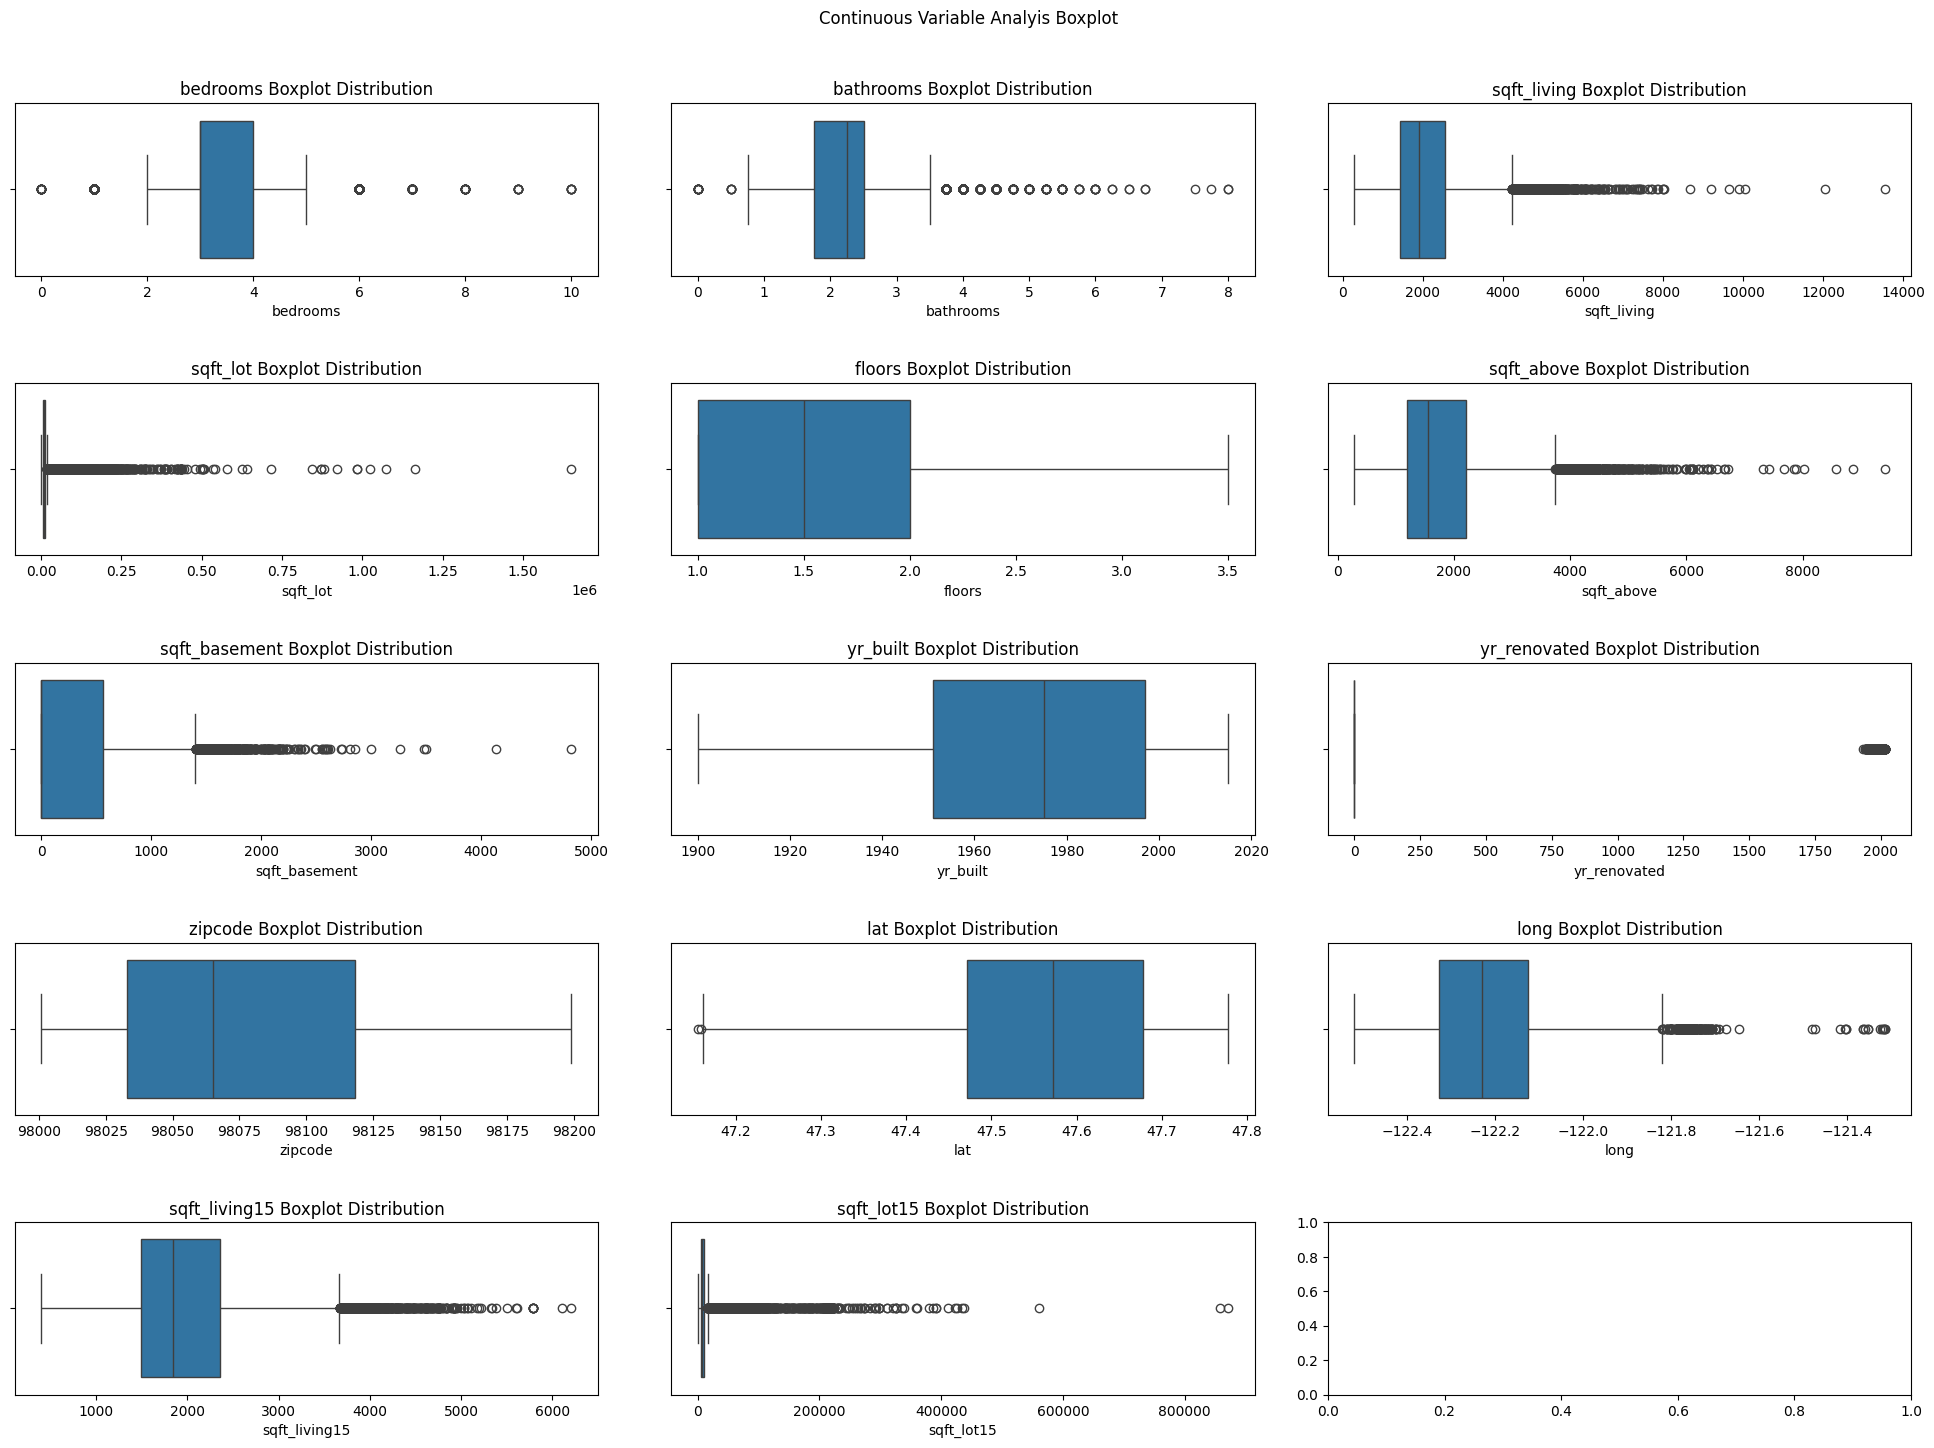

In [5]:
fig , axes = plt.subplots(math.ceil(len(continous_features.columns)/3), 3, figsize=(20, 15))

plt.suptitle("Continuous Variable Analyis Boxplot")

for i, col in enumerate(continous_features.columns):
    sns.boxplot(continous_features, x=col, ax= axes[i//3,i%3])
    axes[i//3,i%3].set_title(f"{col} Boxplot Distribution")

plt.tight_layout(pad=3)
plt.show()

### 3.3 Feature Engineering

#### 3.3.1 Log Transformation due to high Skewness
**Applying log transformation to Lot, Living, Above and Basement**

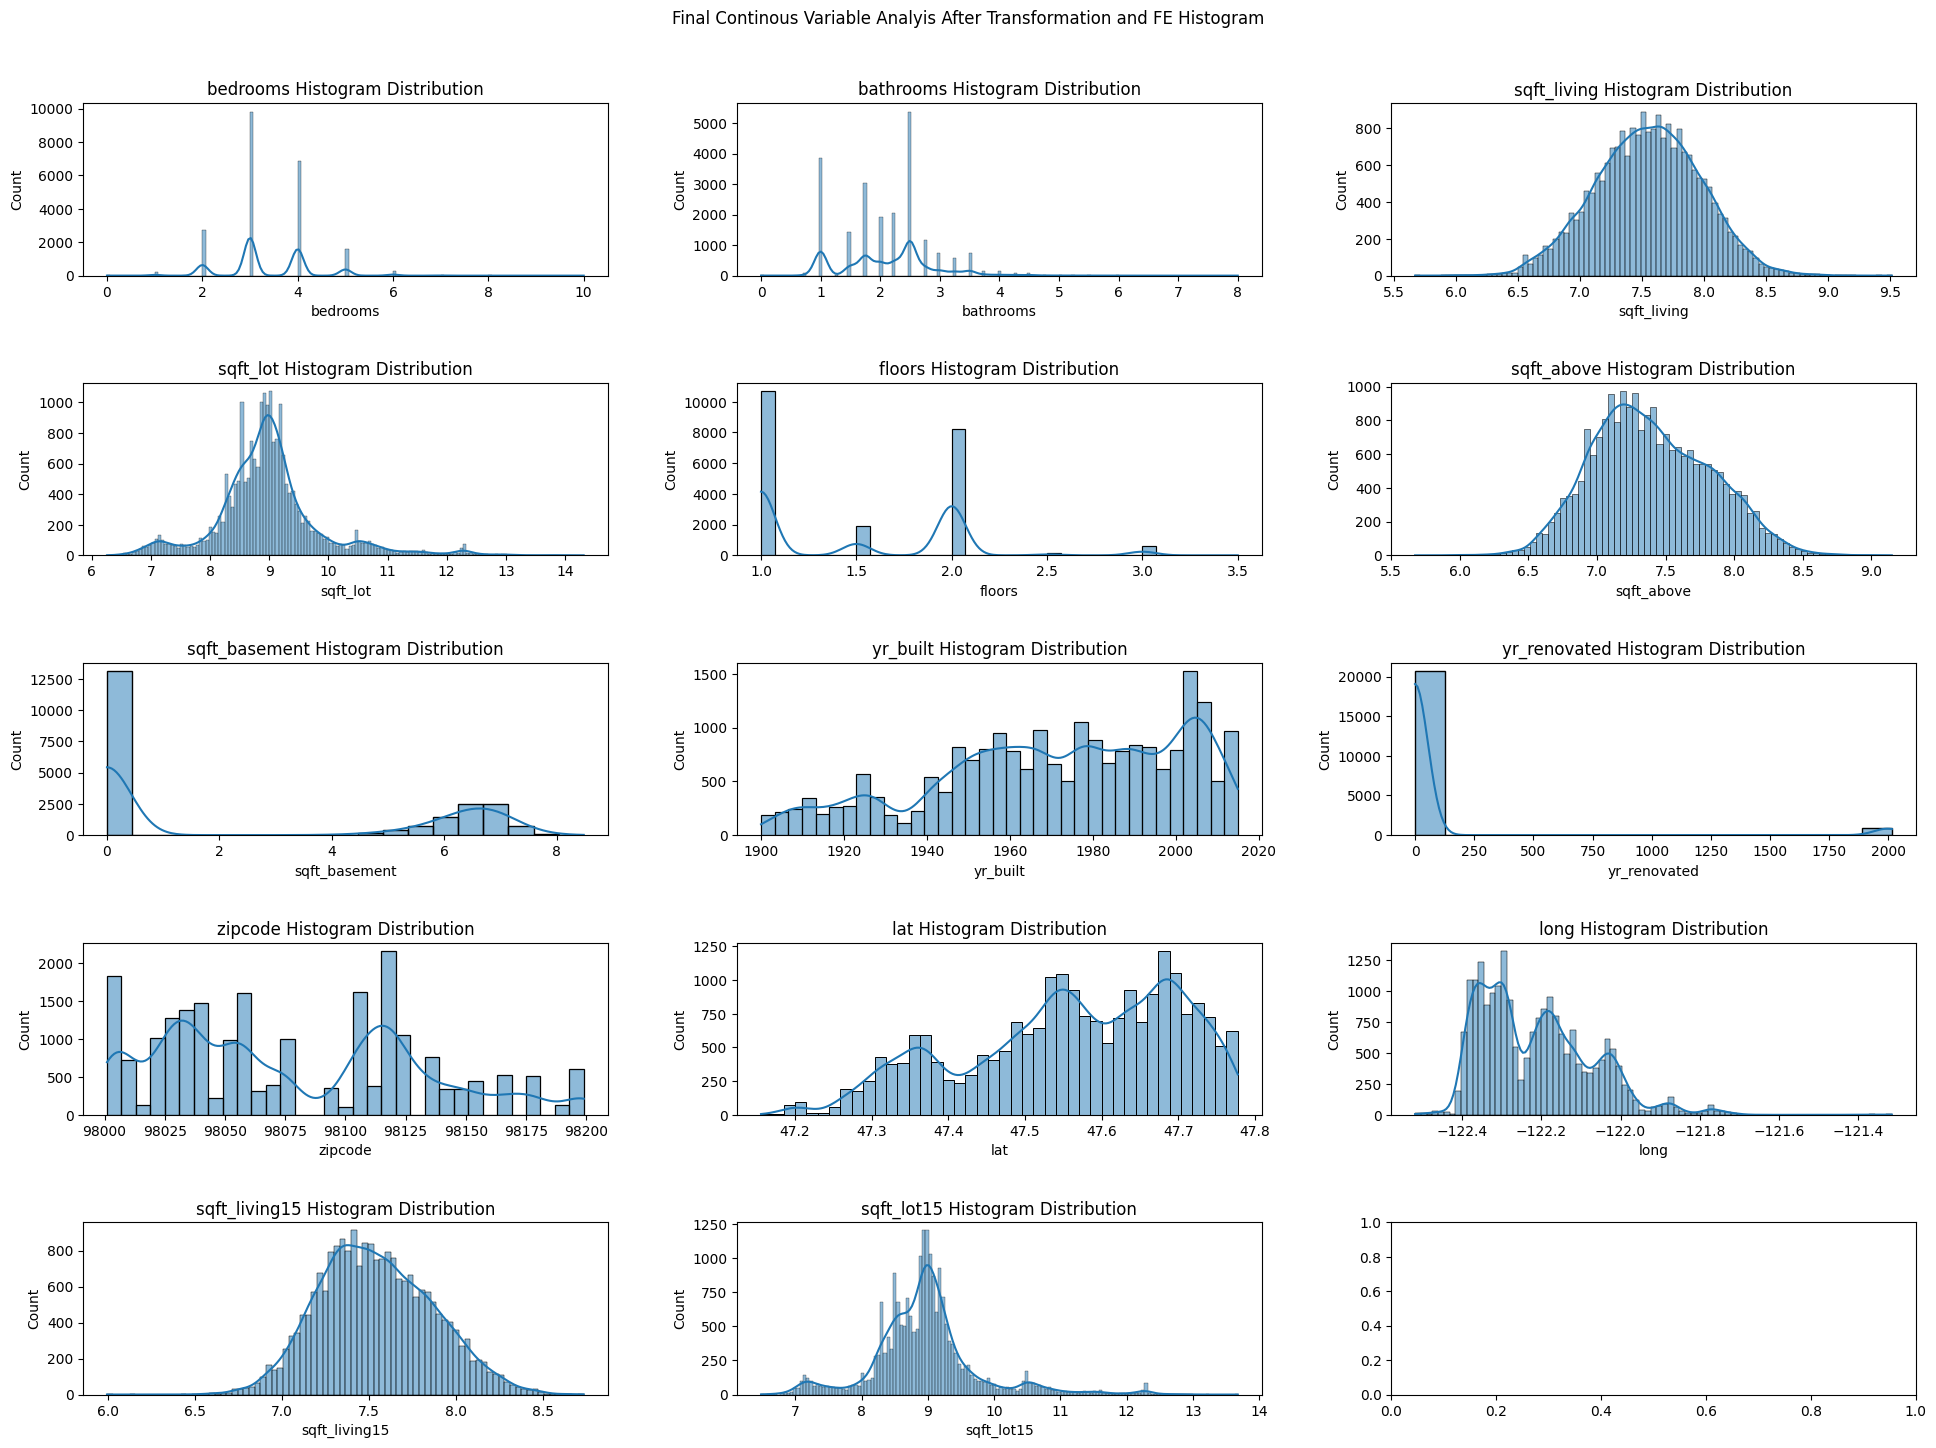

In [6]:
df[['sqft_lot', 'sqft_lot15', 
    'sqft_living', 'sqft_above',
    'sqft_basement','sqft_living15']] = np.log1p(df[['sqft_lot', 'sqft_lot15',
                                                      'sqft_living', 'sqft_above',
                                                      'sqft_basement','sqft_living15']])

continous_features_after = df.drop(columns=['date','price', 'waterfront', 'view', 'condition', 'grade', 'price_log'])

fig , axes = plt.subplots(math.ceil(len(continous_features_after.columns)/3), 3, figsize=(20, 15))

plt.suptitle("Final Continous Variable Analyis After Transformation and FE Histogram")

for i, col in enumerate(continous_features_after.columns):
    sns.histplot(continous_features_after, x=col, ax= axes[i//3,i%3], kde=True)
    axes[i//3,i%3].set_title(f"{col} Histogram Distribution")

plt.tight_layout(pad=3)
plt.show()

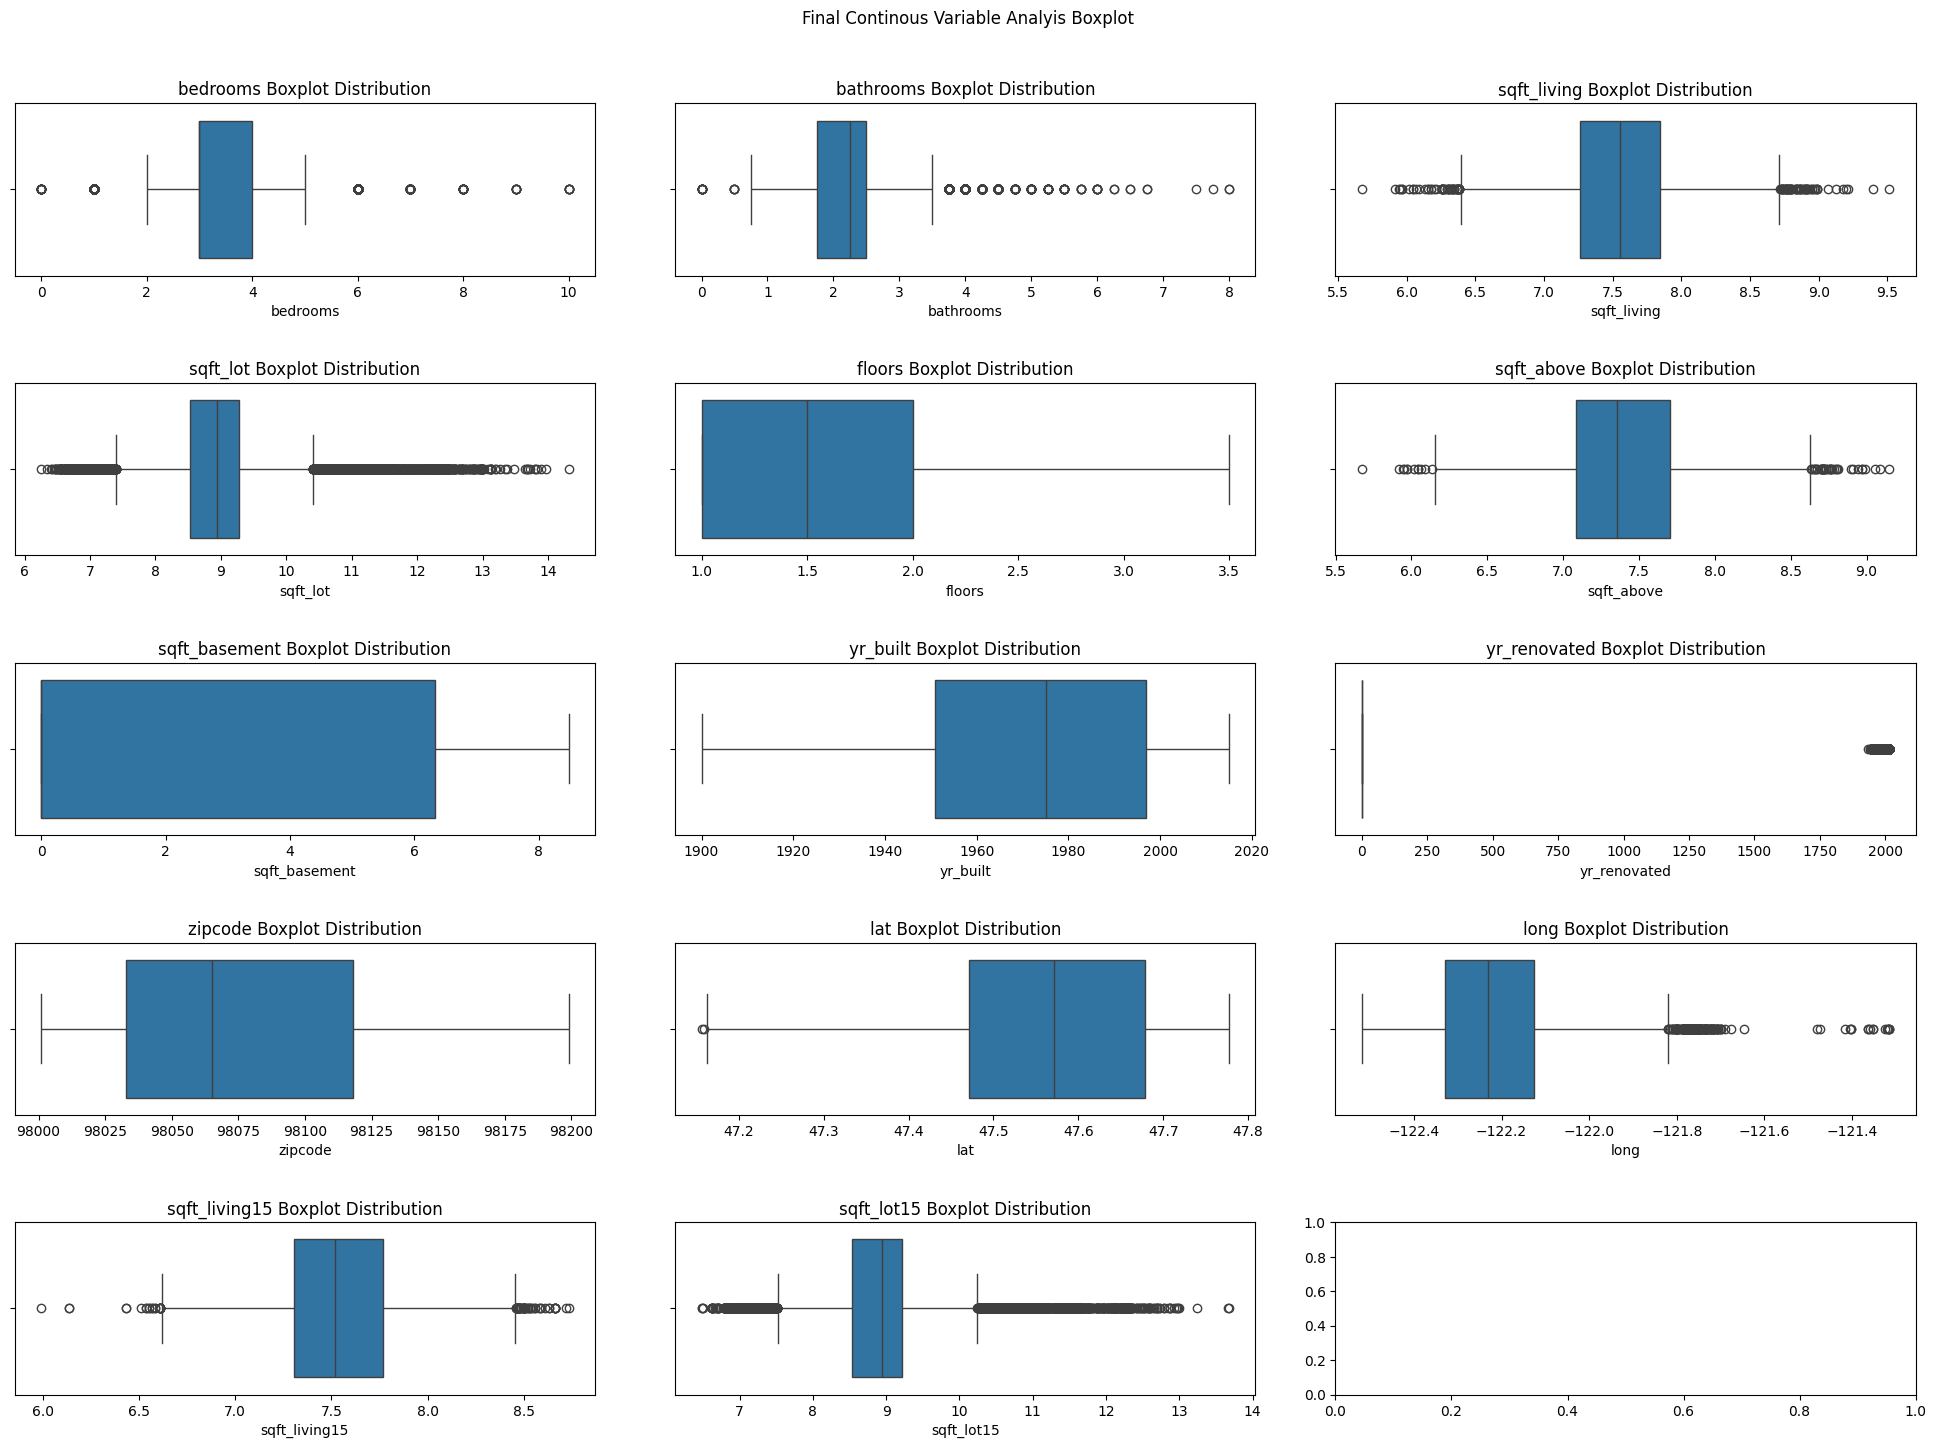

In [7]:
fig , axes = plt.subplots(math.ceil(len(continous_features_after.columns)/3), 3, figsize=(20, 15))

plt.suptitle("Final Continous Variable Analyis Boxplot")

for i, col in enumerate(continous_features_after.columns):
    sns.boxplot(continous_features_after, x=col, ax= axes[i//3,i%3])
    axes[i//3,i%3].set_title(f"{col} Boxplot Distribution")

plt.tight_layout(pad=3)
plt.show()

#### 3.3.2 Create Basement Flag
**Binary indicator for presence of basement**

In [8]:
df['basement_flag'] = np.where(df['sqft_basement'] == 0, 0, 1)

print(df['basement_flag'].value_counts())
print(df['basement_flag'].dtype)

basement_flag
0    13126
1     8487
Name: count, dtype: int64
int32


#### 3.3.3 Create Renovation Flag
**Binary indicator for whether house was renovated**

In [9]:
df['renovated_flag'] = np.where(df['yr_renovated'] == 0, 0, 1)

print(df['renovated_flag'].value_counts())
print(df['renovated_flag'].dtype)

renovated_flag
0    20699
1      914
Name: count, dtype: int64
int32


#### 3.3.3 Calculate House Age
**Deriving property age from construction year**

In [10]:
current_year = datetime.now().year

df['house_age'] = current_year - df['yr_built']

print(df['house_age'].value_counts())
print(df['house_age'].dtype)
print(df['house_age'].head())

house_age
12     559
20     454
21     450
22     433
23     422
      ... 
93      30
125     29
124     27
91      24
92      21
Name: count, Length: 116, dtype: int64
int64
0    71
1    75
2    93
3    61
4    39
Name: house_age, dtype: int64


### 3.4 Discrete Feature Analysis
**Analyzing categorical/ordinal features distributions**

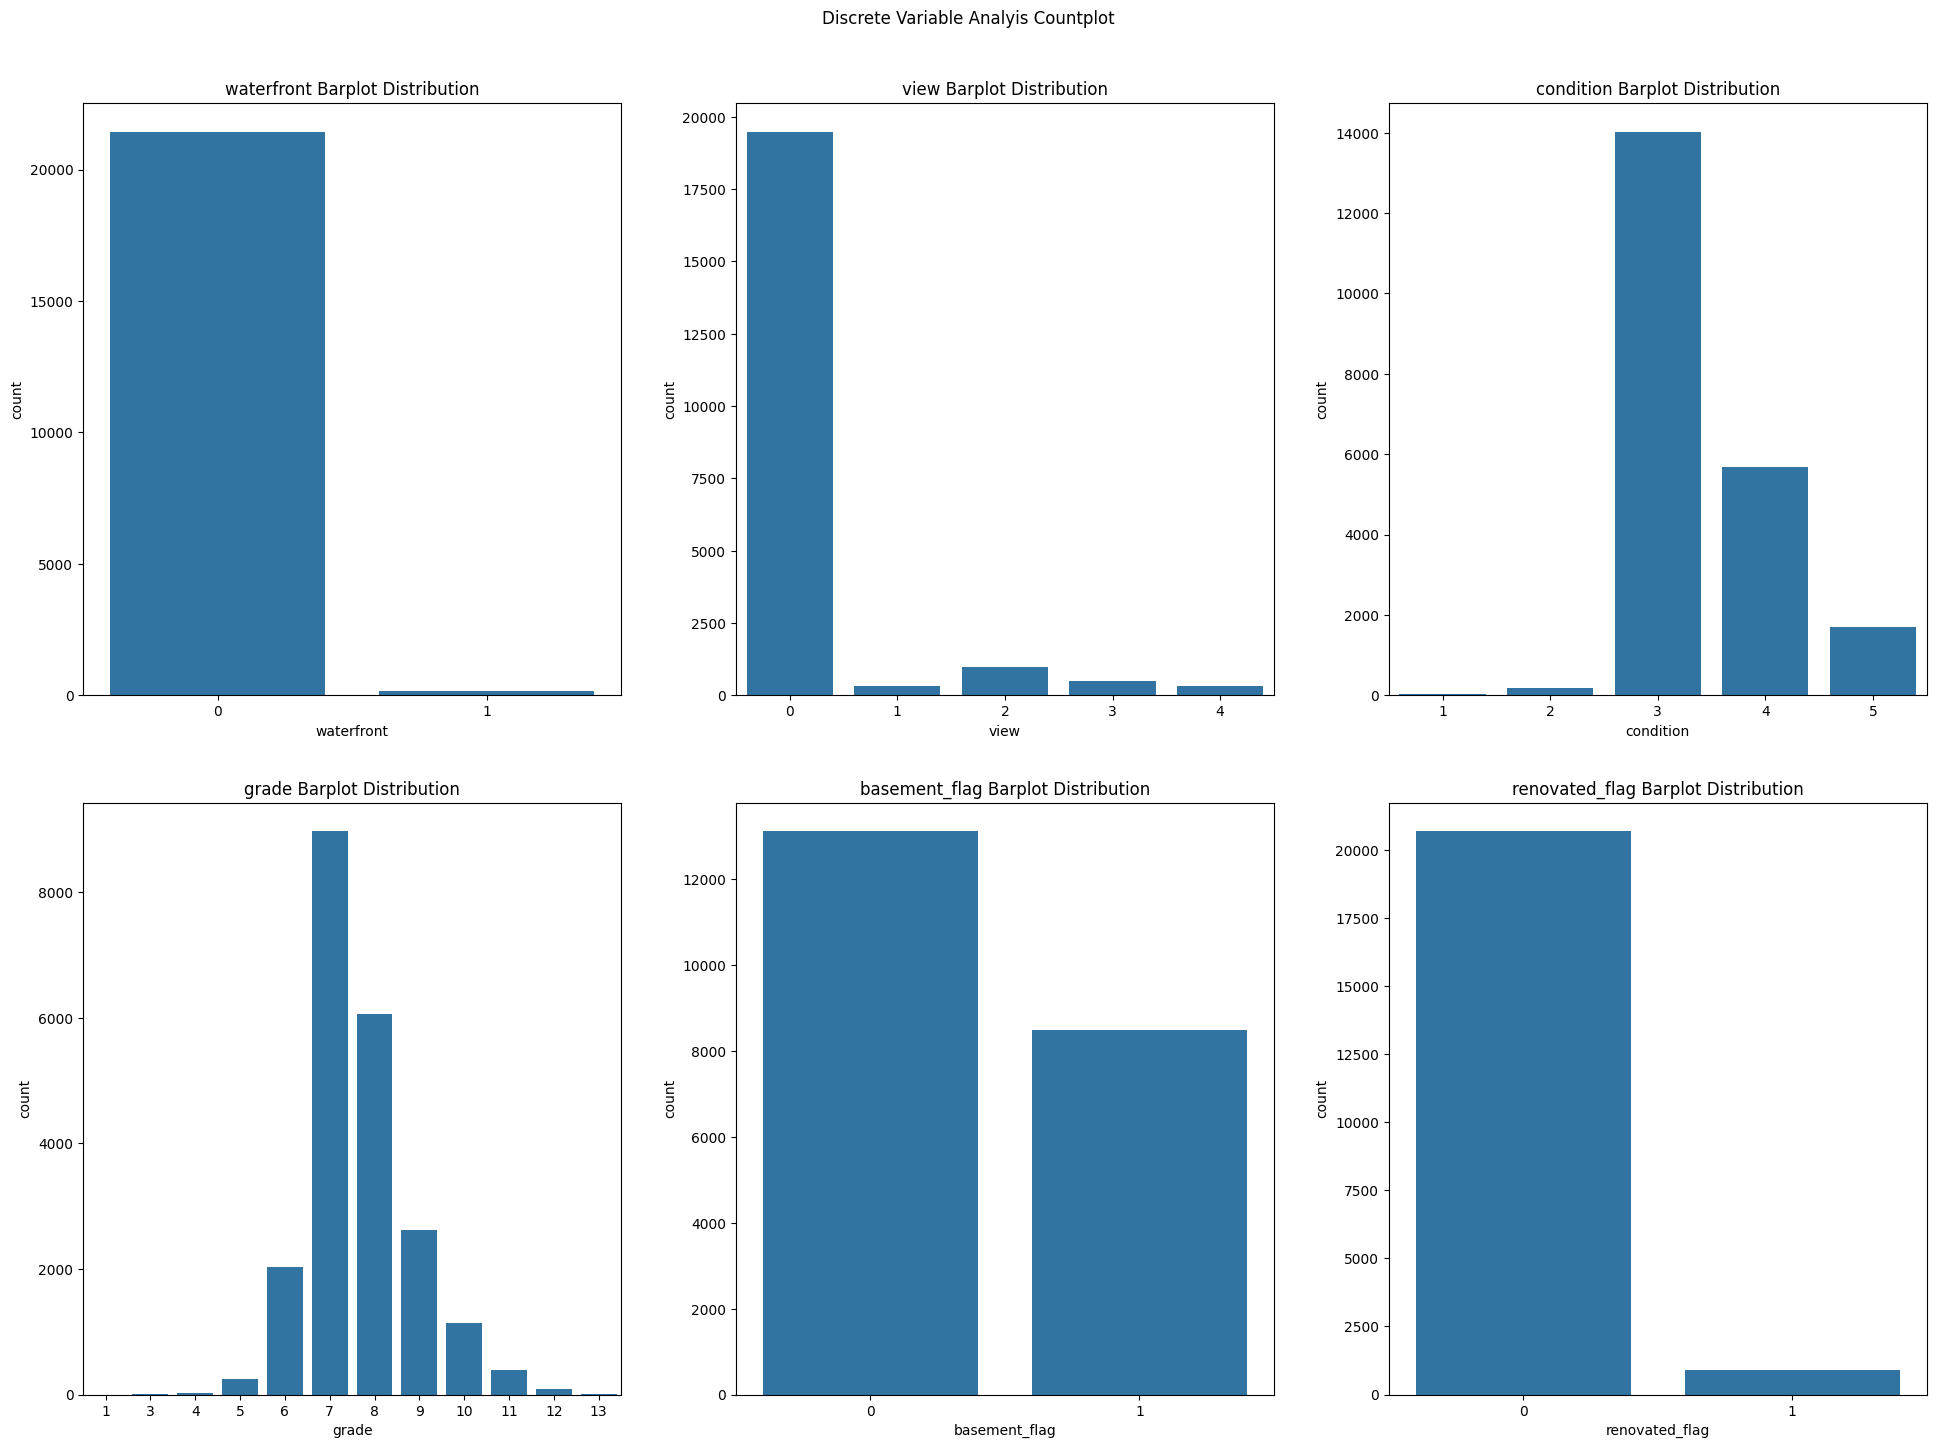

In [11]:
discrete_features = df[['waterfront', 'view', 'condition', 'grade','basement_flag', 'renovated_flag']]

fig , axes = plt.subplots(math.ceil(len(discrete_features.columns)/3), 3, figsize=(20, 15))

plt.suptitle("Discrete Variable Analyis Countplot")

for i, col in enumerate(discrete_features.columns):
    sns.countplot(discrete_features, x=col, ax= axes[i//3,i%3])
    axes[i//3,i%3].set_title(f"{col} Barplot Distribution")

plt.tight_layout(pad=3)
plt.show()

### 3.5 Temporal Analysis

#### 3.5.1 Date Sold Analysis
**Examining price patterns by month and year**

C:\Users\omarh\AppData\Local\Temp\ipykernel_2936\1192754864.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_avg['date'] = pd.to_datetime(monthly_avg['month'].astype(str) + '/' + monthly_avg['year'].astype(str))


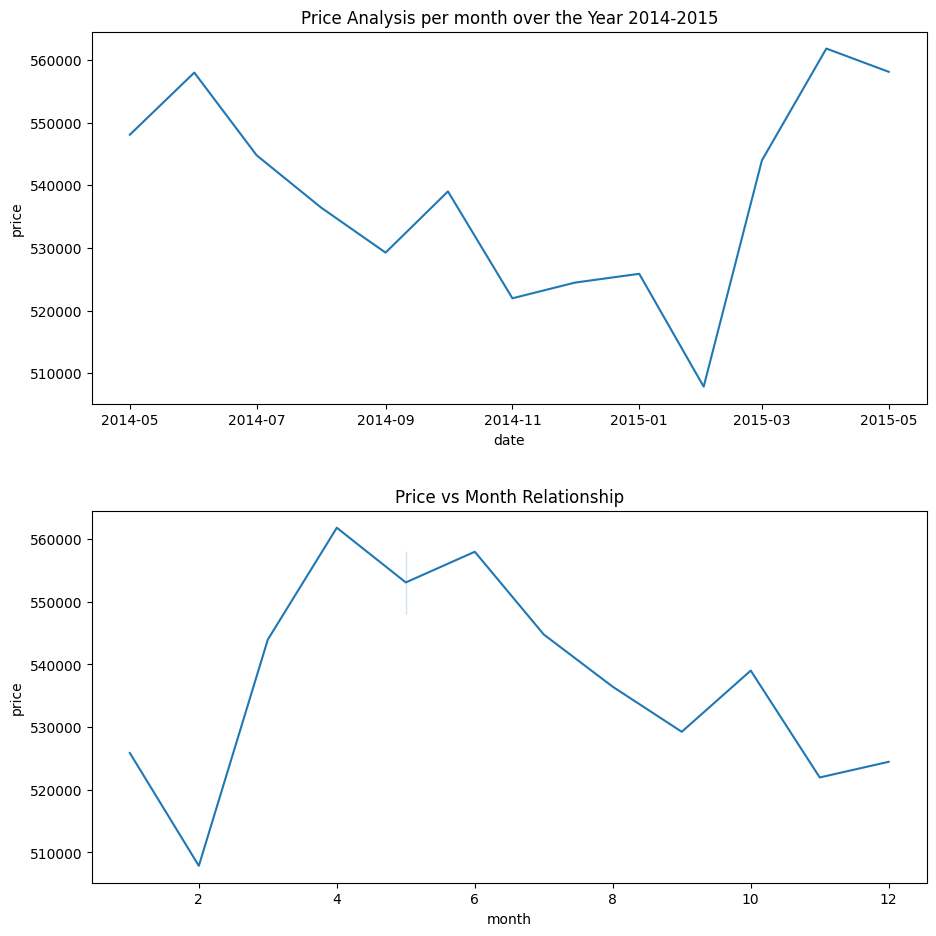

In [12]:
df_month = df.copy()

date = pd.to_datetime(df['date'])

df_month['month'] = date.dt.month
df_month['year'] = date.dt.year

monthly_avg = df_month.groupby(['year','month'])['price'].mean().reset_index()

monthly_avg['date'] = pd.to_datetime(monthly_avg['month'].astype(str) + '/' + monthly_avg['year'].astype(str))
monthly_avg

fig, axes = plt.subplots(2, 1, figsize=(10,10))

sns.lineplot(monthly_avg, x='date', y='price', ax=axes[0])
axes[0].set_title('Price Analysis per month over the Year 2014-2015')

sns.lineplot(monthly_avg, x='month', y='price', ax=axes[1])
axes[1].set_title('Price vs Month Relationship')

plt.tight_layout(pad=3)
plt.show()

### 3.6 Bivariate Analysis

#### 3.6.1 Correlation Matrix
**Analyzing relationships between all numerical features**

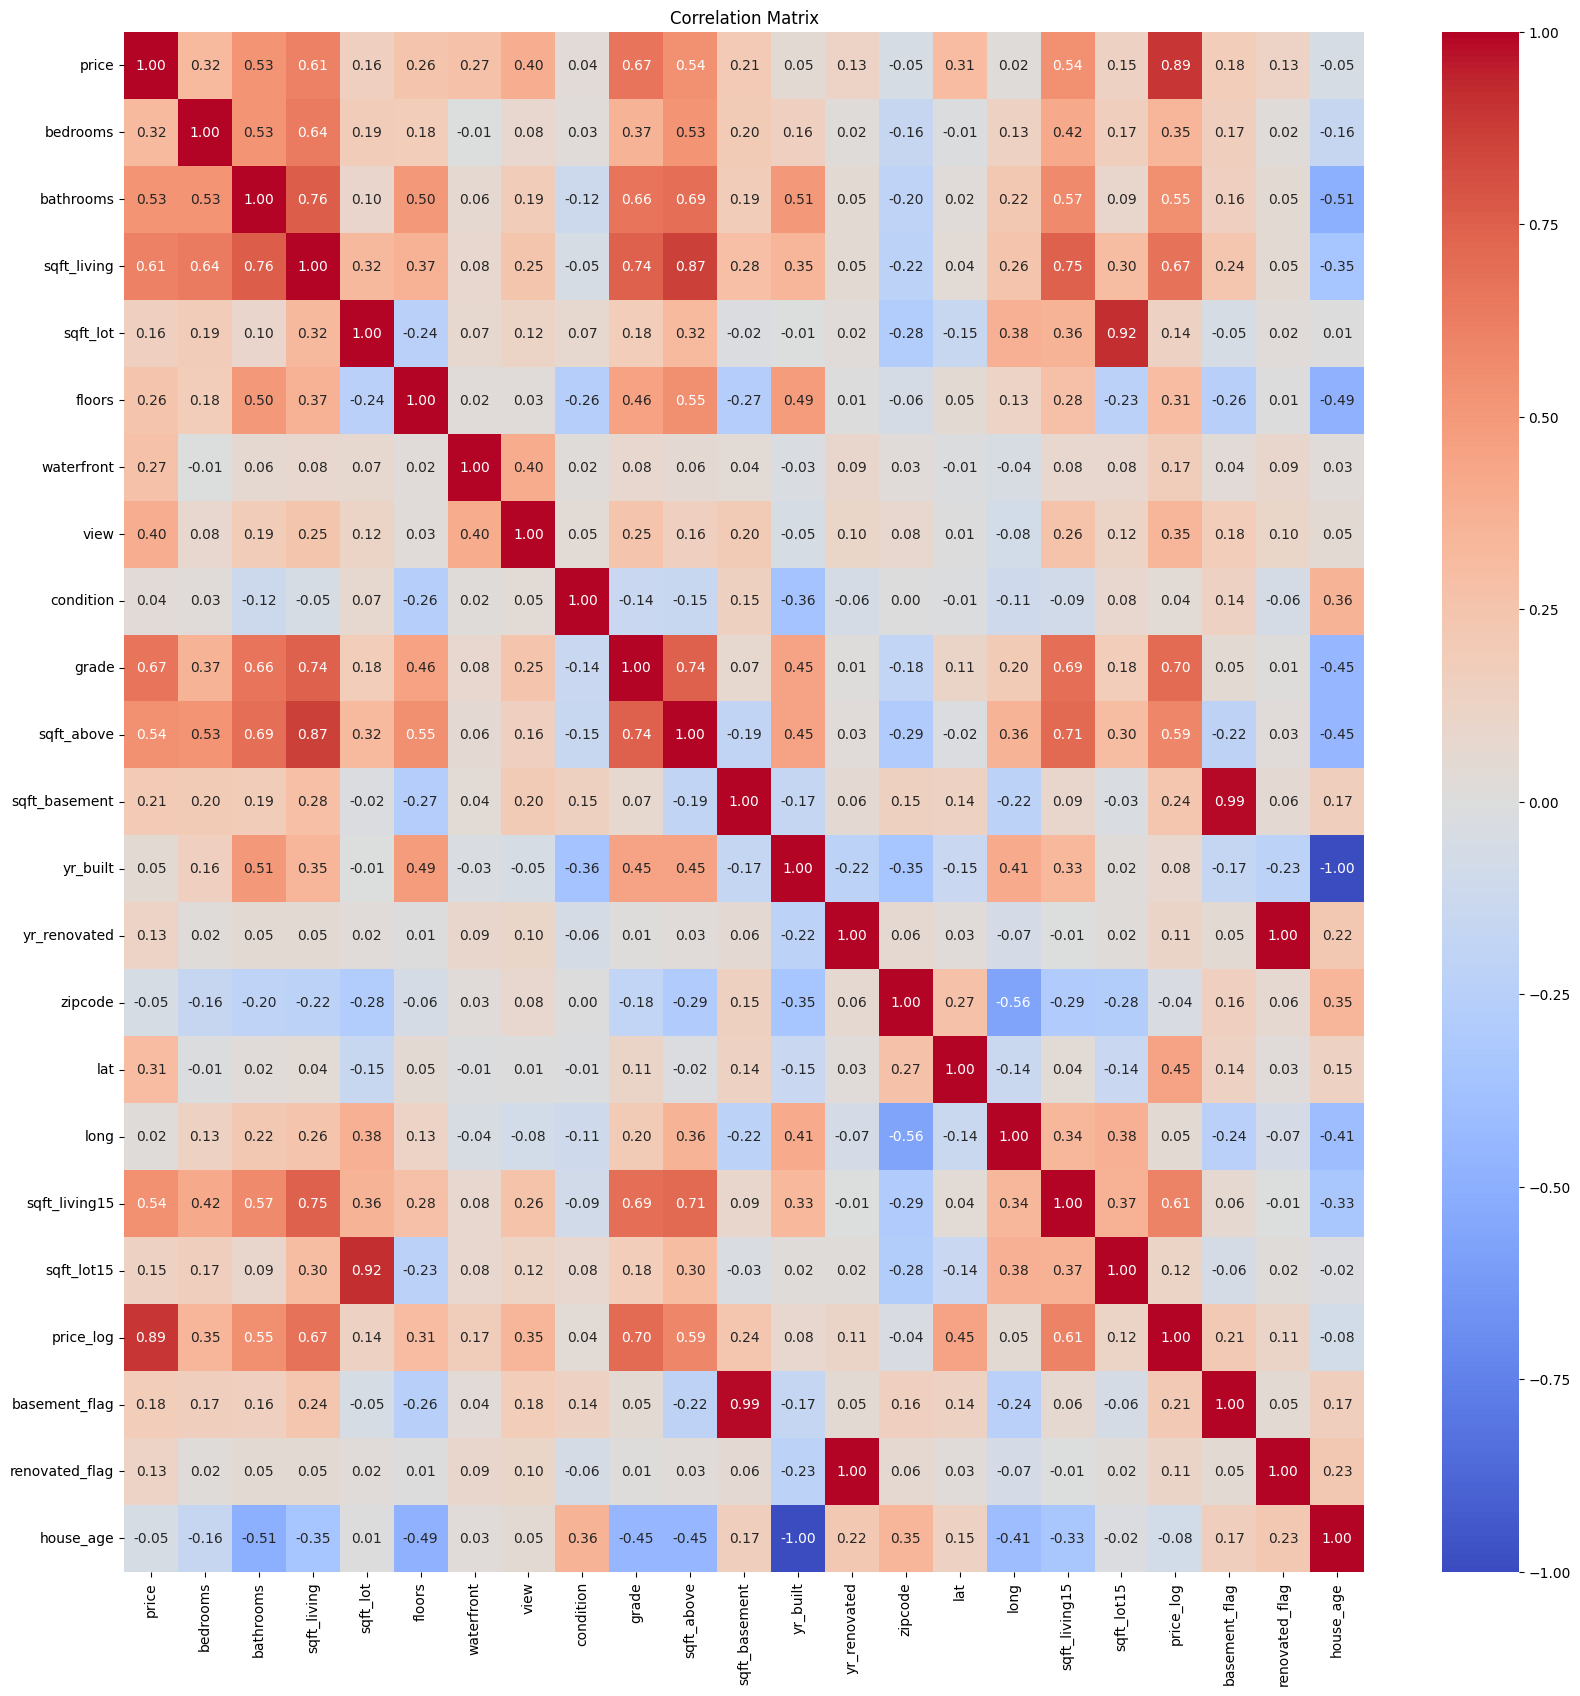

In [13]:
heatmap = df.select_dtypes(include='number')

plt.figure(figsize=(20,20))
sns.heatmap(heatmap.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

based on the heatmap:   
removed:    
yr_built since high correlation with house_age    
yr_renovated since high corr with renovated_flag,   
date very low corr with price,  
price high corr with price_log,     
sqft_lot15 have high corr with sqft_lot,    
sqft_above have high corr with sqft_living  
month since no corr with price_log  
zipcode sice we will rely on lat and long

#### 3.6.2 Feature Selection Based on Correlation
**Removing highly correlated features to reduce multicollinearity**

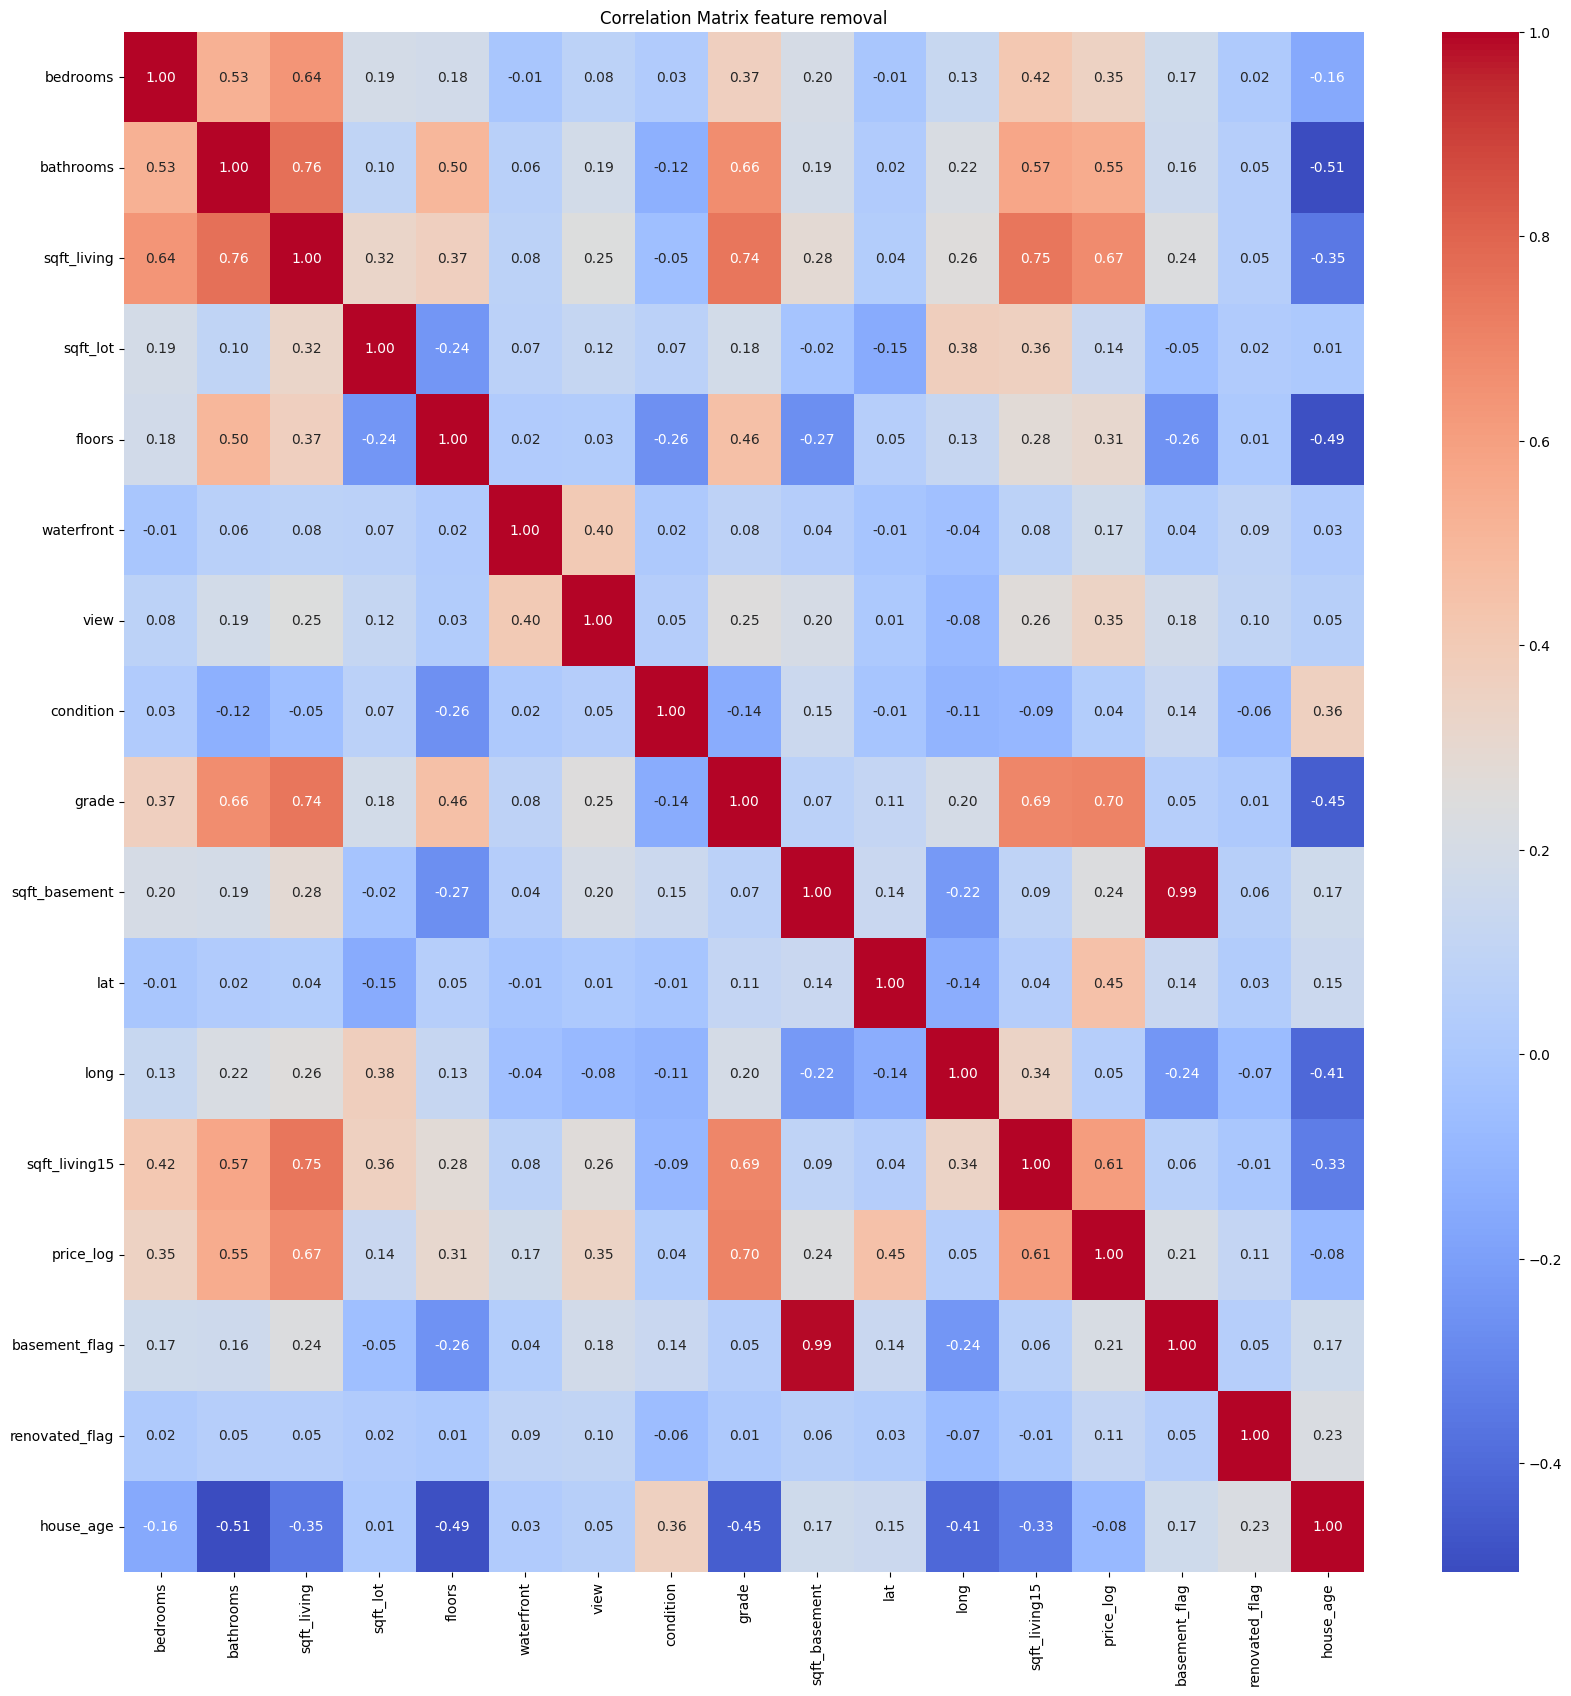

In [14]:
df_corr_analysis = df.drop(columns=['yr_built', 'yr_renovated','date','price','sqft_lot15','sqft_above','zipcode'], axis=1)

heatmap = df_corr_analysis.select_dtypes(include='number')

plt.figure(figsize=(20,20))
sns.heatmap(heatmap.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix feature removal')
plt.show()

#### 3.6.3 Correlation with Target Variable
**Identifying strongest predictors of price**

In [15]:
df_corr_analysis.corr()['price_log']

bedrooms          0.350905
bathrooms         0.550802
sqft_living       0.674940
sqft_lot          0.137734
floors            0.310558
waterfront        0.174586
view              0.346522
condition         0.039558
grade             0.703634
sqft_basement     0.236386
lat               0.449174
long              0.049942
sqft_living15     0.607201
price_log         1.000000
basement_flag     0.212437
renovated_flag    0.114124
house_age        -0.080654
Name: price_log, dtype: float64

In [16]:
df = df_corr_analysis
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'lat',
       'long', 'sqft_living15', 'price_log', 'basement_flag', 'renovated_flag',
       'house_age'],
      dtype='object')

### Saving File

In [17]:
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

df.to_csv('eda_FE.csv', index=False)

file_path = os.path.abspath('eda_FE.csv')
print(f"\nFull file path: {file_path}")

Current working directory: c:\Users\omarh\Documents\Projects\House_Price_Prediction\src

Full file path: c:\Users\omarh\Documents\Projects\House_Price_Prediction\src\eda_FE.csv
